In [45]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

# Set the style of the visualization
plt.style.use('fivethirtyeight')
sns.set(style="white")


In [46]:
# Load the data
df = pd.read_csv('../data/Hitters.csv')
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [48]:
# Drop the rows with missing value
df.dropna(inplace=True)

<Axes: xlabel='Years', ylabel='Hits'>

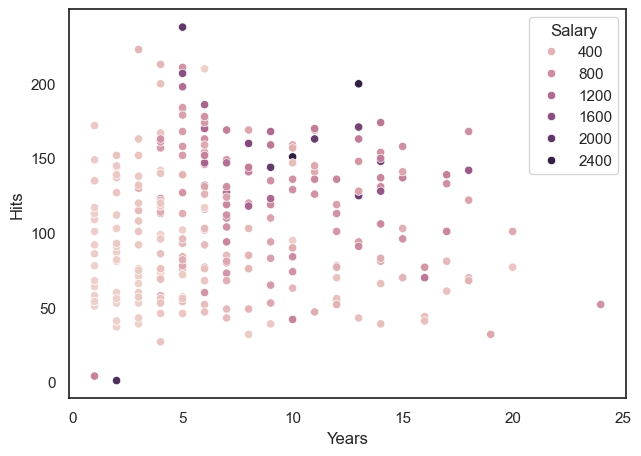

In [49]:
sns.scatterplot(x='Years', y='Hits', data=df, hue='Salary')

In [50]:
# Scale the data then split it into train and test
# Olso make a decision tree model and fit it to the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

X, y = df[['Years', 'Hits']], df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_tree = DecisionTreeRegressor(max_depth=2)
model_tree.fit(X_train_scaled, y_train)

# Show the shape of the data
print(X_train_scaled.shape)
print(X_test.shape)


(210, 2)
(53, 2)


<Axes: xlabel='Years', ylabel='Hits'>

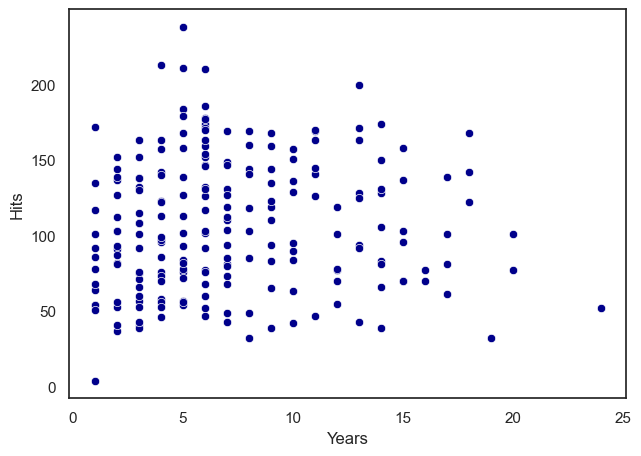

In [51]:
# set the figure size

sns.scatterplot(x='Years', y='Hits', data=X_train, color='darkblue')

<Axes: >

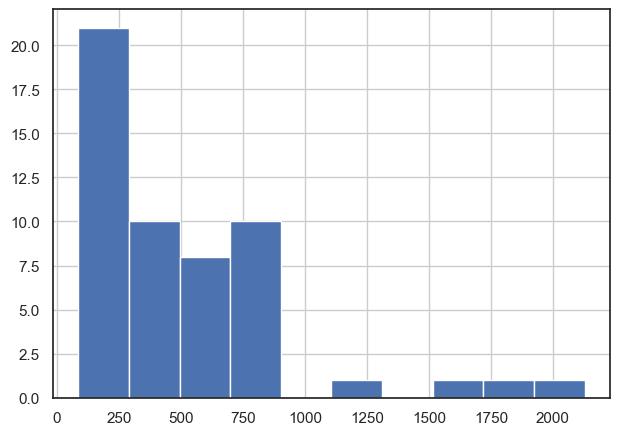

In [52]:
y_test.hist()

In [53]:
model_tree.feature_importances_ # The importance of the features in the model meaning the weight of the features in the model

array([0.58742156, 0.41257844])

[Text(0.5, 0.8333333333333334, 'Years <= 4.5\nsamples = 210\nvalue = 543.665'),
 Text(0.25, 0.5, 'Years <= 3.5\nsamples = 70\nvalue = 203.836'),
 Text(0.125, 0.16666666666666666, 'samples = 51\nvalue = 151.098'),
 Text(0.375, 0.16666666666666666, 'samples = 19\nvalue = 345.395'),
 Text(0.75, 0.5, 'Hits <= 117.5\nsamples = 140\nvalue = 713.579'),
 Text(0.625, 0.16666666666666666, 'samples = 73\nvalue = 472.251'),
 Text(0.875, 0.16666666666666666, 'samples = 67\nvalue = 976.518')]

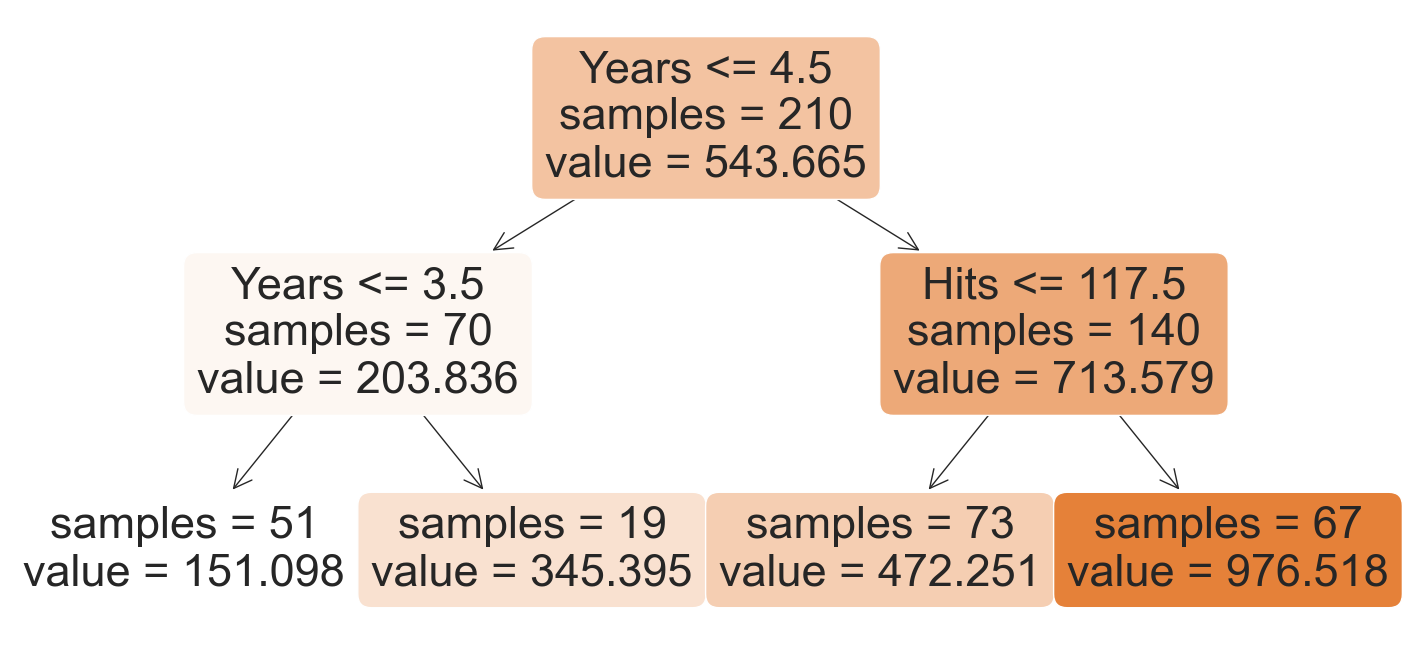

In [55]:
from sklearn import tree
# fit the tree 
model_tree.fit(X_train, y_train) 
fig, ax = plt.figure(figsize=(16, 8), dpi=100), plt.axes()
tree.plot_tree(model_tree, filled=True, ax=ax, feature_names=list(X.columns),impurity=False, rounded=True)

In [56]:
print(tree.export_text(model_tree, feature_names=list(X.columns))) # The text representation of the tree

|--- Years <= 4.50
|   |--- Years <= 3.50
|   |   |--- value: [151.10]
|   |--- Years >  3.50
|   |   |--- value: [345.39]
|--- Years >  4.50
|   |--- Hits <= 117.50
|   |   |--- value: [472.25]
|   |--- Hits >  117.50
|   |   |--- value: [976.52]



In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred = model_tree.predict(X_test) # Predict the test data
mean_squared_error(y_test, y_pred) # Calculate the mean squared error
mean_absolute_error(y_test, y_pred) # Calculate the mean absolute error


235.0067581537342

### Decision tree classification 
As in the regression case, the tree is grown through recursive binary splitting that minimizes a loss function locally. However RSS can't be used as loss function in classification. Instead Gini impurity or cross-entropy can be used. 

Gini impurity measures a nodes purity, with a small value showing that most of the observations come from one class:
$$G = \sum_{k=1}^K \hat{p}_{mk}(1-\hat{p}_{mk})$$

where $\hat{p}_{mk}$ is the proportion of training observations in region $m$ from class $k$. So when $\hat{p}_{mk}$ is near 0 or 1, which means most of that region is from one class, the Gini impurity becomes small.

Cross-entropy is numerically similar to the Gini impurity, as it will be near 0 when $\hat{p}_{mk}$ is near 0 or 1:
$$D = -\sum_{k=1}^K \hat{p}_{mk}\log{\hat{p}_{mk}}$$

In [61]:
df = pd.read_csv('../data/Default.csv')
df = pd.get_dummies(df, drop_first=True) # Convert the categorical data to numerical data
df.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0


In [62]:
X, y = df.drop('default_Yes', axis=1), df['default_Yes'] # Split the data into X and y 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split the data into train and test

# Get the shape of the data
print(X_train.shape)
print(X_test.shape)

(8000, 3)
(2000, 3)


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1931
           1       0.37      0.33      0.35        69

    accuracy                           0.96      2000
   macro avg       0.67      0.66      0.66      2000
weighted avg       0.96      0.96      0.96      2000

[[1892   39]
 [  46   23]]


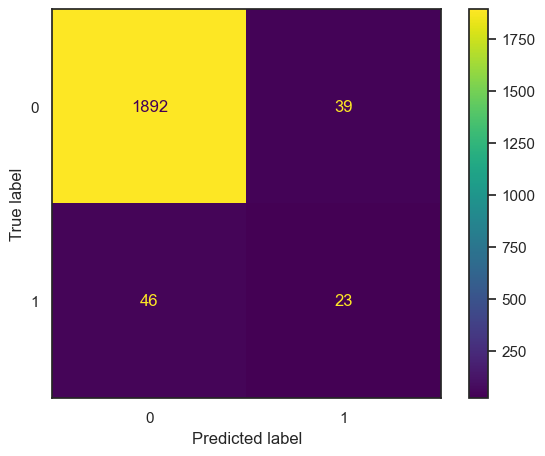

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

clf = DecisionTreeClassifier() # Create a decision tree model
clf.fit(X_train, y_train) # Fit the model to the data

y_pred = clf.predict(X_test) # Predict the test data

print(classification_report(y_test, y_pred)) # Print the classification report
print(confusion_matrix(y_test, y_pred)) # Print the confusion matrix

cm = confusion_matrix(y_test, y_pred) # Get the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_) # Display the confusion matrix
disp.plot()